In [1]:
import pandas as pd
import numpy as np
retail_study=pd.read_excel(r"C:\Users\91771\Downloads\Retail_Case_Study.xlsx"
                           ,sheet_name="Data")
retail_study

,ORDER_ID,ORDER_DATE,PRODUCT_CODE,PRODUCT_NAME,PRODUCT_CATEGORY,PRODUCT_SUB_CATEGORY,RETAILER_QTY,RATE,MRP,STORE_CODE,Store Name,CITY,DELIVERY_DATE,PO_STATUS,Date_diff,Bucket,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,210720181318,2018-07-21,PW219389,NATURE FRESH SOY OIL 1LT PP,Edible Oils,Soya & Mustard Oils,36,85.25,99.0,Store Code 1,Retailer 1,Delhi,2018-07-27 17:16:15,NaN,6.719618,3-7,NaN,NaN,3-7,25063.0
1,40720181157,2018-07-04,PW225238,GLUCON D ORANGE 450G REFILL,Fruit Drinks & Juices,Energy Drinks / Concentrated Powder,4,108.00,150.0,Store Code 2,Retailer 2,Delhi,2018-07-09 18:50:29,NaN,5.785058,3-7,NaN,NaN,Greater than 7,5846.0
2,40720181157,2018-07-04,PW298630,HEAD&SHLD SH SM &SLK 675ML,Hair Care,Shampoo,2,249.01,450.0,Store Code 2,Retailer 2,Delhi,2018-07-09 18:50:29,NaN,5.785058,3-7,NaN,NaN,Less Than 2,12224.0
3,40720181157,2018-07-04,PW294089,WHISPER ULTRA XL WINGS 30'S,Sanitary Needs,Sanitary Pads,6,227.63,310.0,Store Code 2,Retailer 2,Delhi,2018-07-09 18:50:29,NaN,5.785058,3-7,NaN,NaN,NaN,NaN
4,40720181157,2018-07-04,PW213332,PARACHUTE OIL 175 ML,Hair Care,Hair Oil,6,63.00,73.0,Store Code 2,Retailer 2,Delhi,2018-07-09 18:50:29,NaN,5.785058,3-7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43128,70820181024,2018-08-07,PW305970,Nandini Pure Ghee 1 Ltr Pouch,Ghee,Ghee,1,4740.12,5400.0,Store Code 3908,Retailer 3908,Bengaluru,2018-08-09 16:49:50,NaN,2.701273,3-7,NaN,NaN,NaN,NaN
43129,260620181024,2018-07-05,PW306164,VVD COCONUT OIL 500ML BOTTLE,Hair Care,Hair Oil,7,156.56,190.0,Store Code 3909,Retailer 3909,Chennai,2018-07-06 00:00:00,NaN,1.000000,Less Than 2,NaN,NaN,NaN,NaN
43130,260620181024,2018-07-05,PW306169,VVD COCONUT OIL POUCHES 100ML,Hair Care,Hair Oil,30,28.84,35.0,Store Code 3909,Retailer 3909,Chennai,2018-07-12 00:00:00,NaN,7.000000,Greater than 7,NaN,NaN,NaN,NaN
43131,260620181024,2018-07-05,PW306166,VVD COCONUT OIL 100ML BOTTLE,Hair Care,Hair Oil,12,32.96,40.0,Store Code 3909,Retailer 3909,Chennai,2018-07-15 00:00:00,NaN,10.000000,Greater than 7,NaN,NaN,NaN,NaN


In [28]:
def mapper(month):
    return month.strftime('%b') 

retail_study['Month'] = retail_study['ORDER_DATE'].apply(mapper)
retail_study['Month'] 

0        Jul
1        Jul
2        Jul
3        Jul
4        Jul
        ... 
43128    Aug
43129    Jul
43130    Jul
43131    Jul
43132    Jul
Name: Month, Length: 43133, dtype: object

In [29]:
#q1
pd.pivot_table(retail_study,
              index='Month',
              columns='CITY',
              values='RATE',
              aggfunc=np.sum)

CITY,Bengaluru,Chandigarh,Chennai,Delhi,Jaipur,Mumbai,Pune
Month,,,,,,,
Aug,1433293.07,173147.29,247002.67,1394091.92,127237.45,20407.35,1799687.31
Jul,1585993.44,332683.73,692642.51,2411945.39,73193.78,7984.56,3972413.79
Jun,NaN,NaN,42174.86,770176.74,NaN,NaN,1410181.20


In [30]:
#q2
retail_study.groupby('Month')['STORE_CODE'].count()

Month
Aug    13721
Jul    21116
Jun     8296
Name: STORE_CODE, dtype: int64

In [31]:
#q3
retail_study.groupby(['Month','CITY'])['ORDER_ID'].count()

Month  CITY      
Aug    Bengaluru     1058
       Chandigarh     577
       Chennai        333
       Delhi         5639
       Jaipur         373
       Mumbai         257
       Pune          5484
Jul    Bengaluru     1145
       Chandigarh    1076
       Chennai       1014
       Delhi         8780
       Jaipur         222
       Mumbai          66
       Pune          8813
Jun    Chennai         28
       Delhi         4150
       Pune          4118
Name: ORDER_ID, dtype: int64

In [32]:
#q4
retail_study.groupby('CITY')['RATE'].mean()

CITY
Bengaluru     1370.534049
Chandigarh     306.007877
Chennai        714.050938
Delhi          246.443753
Jaipur         336.859210
Mumbai          87.900650
Pune           390.023475
Name: RATE, dtype: float64

In [33]:
#q5
retail_study1=pd.read_excel(r"C:\Users\91771\Downloads\Retail_Case_Study.xlsx",sheet_name='PO status')
u = retail_study.sort_values('ORDER_ID')
v = retail_study1.sort_values('ORDER_ID')[['PO_STATUS']].reset_index(drop=1)
out = pd.concat([u, v], 1)

out.head()

,ORDER_ID,ORDER_DATE,PRODUCT_CODE,PRODUCT_NAME,PRODUCT_CATEGORY,PRODUCT_SUB_CATEGORY,RETAILER_QTY,RATE,MRP,STORE_CODE,...,DELIVERY_DATE,PO_STATUS,Date_diff,Bucket,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Month,PO_STATUS
0,210720181318,2018-07-21,PW219389,NATURE FRESH SOY OIL 1LT PP,Edible Oils,Soya & Mustard Oils,36,85.25,99.0,Store Code 1,...,2018-07-27 17:16:15,NaN,6.719618,3-7,NaN,NaN,3-7,25063.0,Jul,CONFIRM_DELIVERED
1,40720181157,2018-07-04,PW225238,GLUCON D ORANGE 450G REFILL,Fruit Drinks & Juices,Energy Drinks / Concentrated Powder,4,108.00,150.0,Store Code 2,...,2018-07-09 18:50:29,NaN,5.785058,3-7,NaN,NaN,Greater than 7,5846.0,Jul,DELIVERY_PENDING
2,40720181157,2018-07-04,PW298630,HEAD&SHLD SH SM &SLK 675ML,Hair Care,Shampoo,2,249.01,450.0,Store Code 2,...,2018-07-09 18:50:29,NaN,5.785058,3-7,NaN,NaN,Less Than 2,12224.0,Jul,CONFIRM_DELIVERED
3,40720181157,2018-07-04,PW294089,WHISPER ULTRA XL WINGS 30'S,Sanitary Needs,Sanitary Pads,6,227.63,310.0,Store Code 2,...,2018-07-09 18:50:29,NaN,5.785058,3-7,NaN,NaN,NaN,NaN,Jul,PARTIAL_DELIVERED
4,40720181157,2018-07-04,PW213332,PARACHUTE OIL 175 ML,Hair Care,Hair Oil,6,63.00,73.0,Store Code 2,...,2018-07-09 18:50:29,NaN,5.785058,3-7,NaN,NaN,NaN,NaN,Jul,PARTIAL_DELIVERED


In [34]:
#data interpretation and visulization
#q1
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

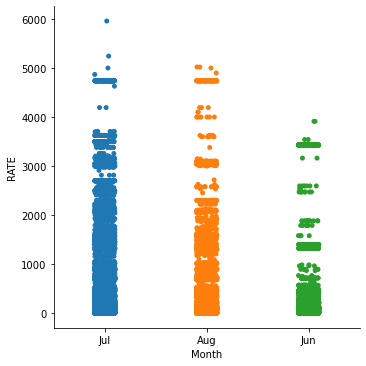

In [35]:
sns.catplot(data=retail_study, x ="Month", y = "RATE")
plt.show()

<AxesSubplot:xlabel='CITY', ylabel='RATE'>

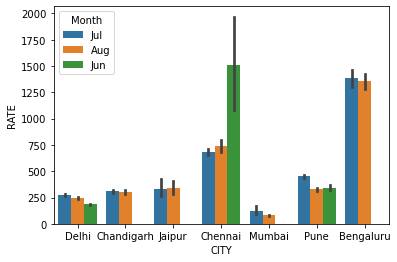

In [36]:
sns.barplot(x ='CITY', y ='RATE', data = retail_study, hue ='Month') 

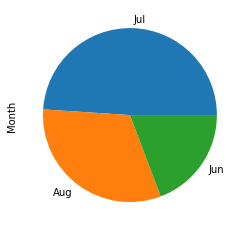

In [37]:
retail_study['Month'].value_counts().plot.pie()
plt.show()

<AxesSubplot:xlabel='PRODUCT_CATEGORY', ylabel='RATE'>

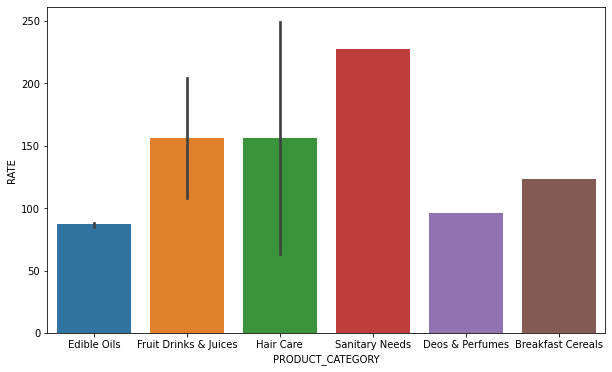

In [38]:
#q3
plt.figure(figsize=[10,6])
sns.barplot(x =retail_study['PRODUCT_CATEGORY'].head(10), y ='RATE', data = retail_study) 

In [2]:
#q2
from datetime import date
retail_study['Difference'] = (retail_study['DELIVERY_DATE'] - retail_study['ORDER_DATE']).dt.days
retail_study.head()

,ORDER_ID,ORDER_DATE,PRODUCT_CODE,PRODUCT_NAME,PRODUCT_CATEGORY,PRODUCT_SUB_CATEGORY,RETAILER_QTY,RATE,MRP,STORE_CODE,...,CITY,DELIVERY_DATE,PO_STATUS,Date_diff,Bucket,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Difference
0,210720181318,2018-07-21,PW219389,NATURE FRESH SOY OIL 1LT PP,Edible Oils,Soya & Mustard Oils,36,85.25,99.0,Store Code 1,...,Delhi,2018-07-27 17:16:15,NaN,6.719618,3-7,NaN,NaN,3-7,25063.0,6
1,40720181157,2018-07-04,PW225238,GLUCON D ORANGE 450G REFILL,Fruit Drinks & Juices,Energy Drinks / Concentrated Powder,4,108.00,150.0,Store Code 2,...,Delhi,2018-07-09 18:50:29,NaN,5.785058,3-7,NaN,NaN,Greater than 7,5846.0,5
2,40720181157,2018-07-04,PW298630,HEAD&SHLD SH SM &SLK 675ML,Hair Care,Shampoo,2,249.01,450.0,Store Code 2,...,Delhi,2018-07-09 18:50:29,NaN,5.785058,3-7,NaN,NaN,Less Than 2,12224.0,5
3,40720181157,2018-07-04,PW294089,WHISPER ULTRA XL WINGS 30'S,Sanitary Needs,Sanitary Pads,6,227.63,310.0,Store Code 2,...,Delhi,2018-07-09 18:50:29,NaN,5.785058,3-7,NaN,NaN,NaN,NaN,5
4,40720181157,2018-07-04,PW213332,PARACHUTE OIL 175 ML,Hair Care,Hair Oil,6,63.00,73.0,Store Code 2,...,Delhi,2018-07-09 18:50:29,NaN,5.785058,3-7,NaN,NaN,NaN,NaN,5


In [6]:
retail_study["Bucket1"]=np.where(retail_study["Difference"] <2, 'low', 
         (np.where(retail_study["Difference"] <7, 'medium', 'high')))

retail_study["Bucket1"]

0        medium
1        medium
2        medium
3        medium
4        medium
          ...  
43128    medium
43129       low
43130      high
43131      high
43132    medium
Name: Bucket1, Length: 43133, dtype: object

In [45]:
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
a=np.where(retail_study["Difference"]<2)
a
<timedelta(days=2)

SyntaxError: invalid syntax (<ipython-input-45-9c9d2879cf55>, line 6)

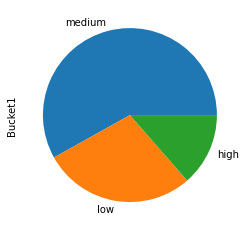

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
retail_study['Bucket1'].value_counts().plot.pie()
plt.show()

In [6]:
df1=retail_study.groupby('PRODUCT_CATEGORY')['PRODUCT_SUB_CATEGORY']
df1.first()

PRODUCT_CATEGORY
Atta, Flours & Sooji                                             Atta
BATTERY                                                       BATTERY
Baby Care                                        Baby Creams & Lotion
Baby Food                                                 Baby Cereal
Baking & Dessert Items                                          CAKES
Biscuits                                                      Cookies
Breakfast Cereals                                                Oats
Chocolate & Confectionaries                                Chocolates
Cleaning Accessories                              Brushes & Scrubbers
Cosmetics                                                      Bleach
DAIRY PRODUCTS                                        DAIRY WHITENERS
Dals & Pulses                                       Urad & Other Dals
Deos & Perfumes                                              Mens Deo
Detergents                                            Washing Powders
Edi

In [21]:
temp_data = pd.pivot_table(retail_study,
              index='PRODUCT_CATEGORY',
              columns='PRODUCT_SUB_CATEGORY',
              values='STORE_CODE',
              aggfunc=lambda x: len(x))

In [26]:
temp_data.loc['Ghee'].value_counts()

3365.0    1
Name: Ghee, dtype: int64